In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('S02-hw-dataset.csv')
print(df)

    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          2      442
20       21  

In [5]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,41.0,NaN,NaN,NaN,20.243902,11.659289,1.0,10.0,20.0,30.0,40.0
age,39.0,NaN,NaN,NaN,36.512821,18.304259,5.0,24.0,33.0,45.5,120.0
country,41,5,RU,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchases,41.0,NaN,NaN,NaN,4.829268,2.710189,-1.0,3.0,5.0,7.0,11.0
revenue,41.0,NaN,NaN,NaN,820.04878,613.127269,0.0,432.0,693.0,1115.0,2475.0


In [8]:
print(df[['user_id']].describe())

         user_id
count  41.000000
mean   20.243902
std    11.659289
min     1.000000
25%    10.000000
50%    20.000000
75%    30.000000
max    40.000000


In [12]:
print(df.isna().mean())

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [14]:
dup_mask = df.duplicated()
dup_count = dup_mask.sum()
print(f"Количество полностью дублирующихся строк: {dup_count}")

if dup_count > 0:
    df[dup_mask]
print(df.duplicated())

Количество полностью дублирующихся строк: 1
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


In [18]:
print("Возраст > 100 лет:")
print(df[df['age'] > 100])
print("Возраст < 18 лет:")
print(df[df['age'] < 18])
print("Отрицательные значения purchases:")
print(df[df['purchases'] < 0])
print("Нулевые значения дохода при ненулевом значении покупок:")
print(df[(df['revenue'] == 0) & (df['purchases'] > 0)])

Возраст > 100 лет:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Возраст < 18 лет:
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488
Отрицательные значения purchases:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Нулевые значения дохода при ненулевом значении покупок:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


#В датасете 41 наблюдение и 5 колонок: user_id, age, country, purchases, revenue. Пропуски есть только в признаке age (примерно 4,9% строк), в остальных столбцах пропусков нет. Найдена одна полностью дублирующаяся строка с одинаковым user_id и всеми признаками — это, вероятно, технический дубль записи о пользователе и его можно удалить при дальнейшей очистке.

#Среди логических аномалий: обнаружена запись с возрастом 120 лет и числом покупок -1 — такой пользователь выглядит нереалистично (и отрицательное количество покупок противоречит здравому смыслу), также пристствует пользователь с аномальным возрастом - 5 лет. Кроме того, есть строка, где указаны 4 покупки при нулевом доходе (revenue = 0), что тоже может указывать на ошибку ввода или особый тип транзакций (например, бесплатные заказы).

In [19]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols


Index(['country'], dtype='object')

In [20]:
# частоты по стране
df["country"].value_counts(dropna=False)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [23]:
# средние покупки и выручка по странам
grouped_country = (
    df
    .groupby("country")[["purchases", "revenue"]]
    .mean()
    .reset_index()
)

grouped_country


,country,purchases,revenue
0,CN,4.500000,1054.000000
1,DE,6.500000,1445.500000
2,FR,4.250000,675.916667
3,RU,4.769231,790.076923
4,US,4.625000,557.375000


In [25]:
# Осмысленная возрастная группировка
age_bins_short = [0, 18, 30, 45, 60, 120]
age_labels_short = [
    "Дети и подростки (<=18)",
    "Молодые (19–30)",
    "Взрослые (31–45)",
    "Зрелый возраст (46–60)",
    "Старше 60"
]

df["age_group"] = pd.cut(
    df["age"],
    bins=age_bins_short,
    labels=age_labels_short,
    include_lowest=True
)

# Частоты по возрастным группам
print("Распределение пользователей по возрастным группам:")
print(df["age_group"].value_counts().sort_index())


Распределение пользователей по возрастным группам:
age_group
Дети и подростки (<=18)     2
Молодые (19–30)            13
Взрослые (31–45)           14
Зрелый возраст (46–60)      9
Старше 60                   1
Name: count, dtype: int64


Наиболее представленные страны в выборке — Россия (RU) и Франция (FR), за ними идут США (US), Германия (DE) и Китай (CN). Количество пользователей по странам распределено относительно неравномерно, при этом RU и FR дают основную часть наблюдений.

По группировке видно, что среднее число покупок и средний доход заметно различаются между странами: например, у пользователей из DE и CN средний revenue выше, чем у остальных, но важно помнить, что для некоторых стран (например, CN) выборка очень маленькая, поэтому оценки могут быть нестабильными. Возрастная структура смещена в диапазон от 19 до 45 лет — больше всего пользователей в группах 19–30 и 31–45, есть единичные наблюдения младше 18 и старше 60.

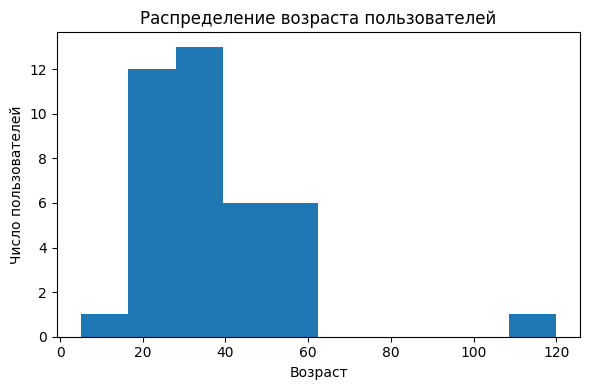

In [26]:
#Гистограмма возраста пользователей
plt.figure(figsize=(6, 4))
plt.hist(df["age"].dropna(), bins=10)
plt.title("Распределение возраста пользователей")
plt.xlabel("Возраст")
plt.ylabel("Число пользователей")
plt.tight_layout()

plt.savefig("figures/hist_age.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 600x400 with 0 Axes>

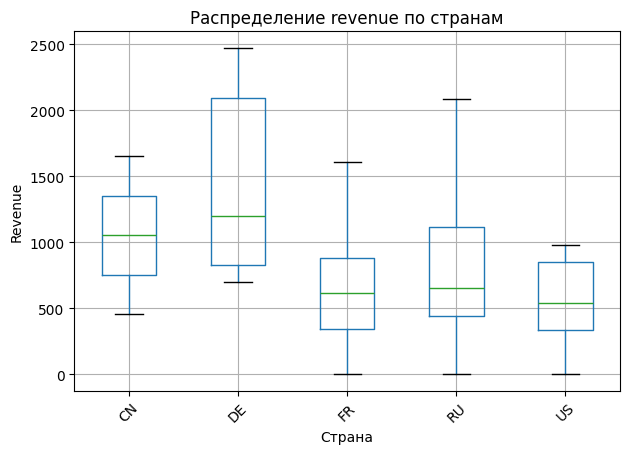

In [29]:
#Boxplot дохода по странам
plt.figure(figsize=(6, 4))
df.boxplot(column="revenue", by="country", rot=45)
plt.title("Распределение revenue по странам")
plt.suptitle("")  # убираем лишний общий заголовок
plt.xlabel("Страна")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("figures/box_revenue_by_country.png", dpi=300, bbox_inches="tight")
plt.show()


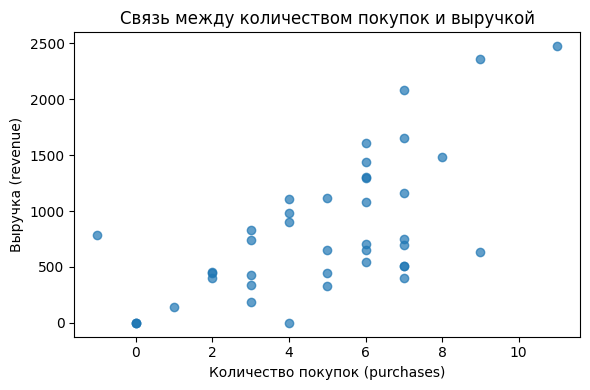

In [33]:
# Scatter plot: purchases vs revenue (Связь между количеством покупок и выручкой)
plt.figure(figsize=(6, 4))
plt.scatter(df["purchases"], df["revenue"], alpha=0.7)
plt.title("Связь между количеством покупок и выручкой")
plt.xlabel("Количество покупок (purchases)")
plt.ylabel("Выручка (revenue)")
plt.tight_layout()

plt.savefig("figures/scatter_purchases_revenue.png", dpi=300, bbox_inches="tight")
plt.show()

Гистограмма возраста показывает, что основная часть пользователей находится в диапазоне от 20 до примерно 50 лет, с небольшим количеством наблюдений на краях распределения, включая один выброс около 120 лет, который, скорее всего, является ошибкой в данных.

Boxplot revenue по странам демонстрирует различия в медианном доходе и разбросе значений: для некоторых стран распределение более «растянуто», что говорит о сильной неоднородности выручки.

Scatter plot между purchases и revenue показывает ожидаемую положительную зависимость: при увеличении числа покупок выручка, как правило, растёт, хотя встречаются отдельные случаи с нулевым доходом при ненулевом количестве покупок, что выглядит аномалией.